### 1. 목표
- 500명의 키와 몸무게,비만도 라벨을 이용해 비만은 판단하는 모델을 만들어보자

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
bmi=pd.read_csv('bmi_500.csv',index_col='Label')

In [10]:
bmi.info()
# 결측치 X

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [11]:
#기술통계 확인
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [12]:
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [14]:
bmi.head(2)

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87


In [25]:
#노말데이터만 뽑기/키
bmi.loc['Normal']['Height']

Label
Normal    189
Normal    195
Normal    155
Normal    191
Normal    172
         ... 
Normal    178
Normal    167
Normal    151
Normal    187
Normal    164
Name: Height, Length: 69, dtype: int64

In [28]:
#'Weak' 인사람의 몸무게
bmi.loc['Weak']['Weight']

Label
Weak    62
Weak    52
Weak    65
Weak    54
Weak    69
Weak    57
Weak    62
Weak    50
Weak    57
Weak    65
Weak    69
Weak    58
Weak    61
Weak    60
Weak    62
Weak    56
Weak    61
Weak    54
Weak    59
Weak    65
Weak    56
Weak    53
Name: Weight, dtype: int64

In [27]:
bmi.loc[['Normal'],['Height']]

,Height
Label,
Normal,189
Normal,195
Normal,155
Normal,191
Normal,172
...,...
Normal,178
Normal,167
Normal,151


In [29]:
#시각화 함수 만들기
def myScatter(label,color):
    tmp = bmi.loc[label]
    plt.scatter(tmp['Weight'],
               tmp['Height'],
               c=color,
               label=label)

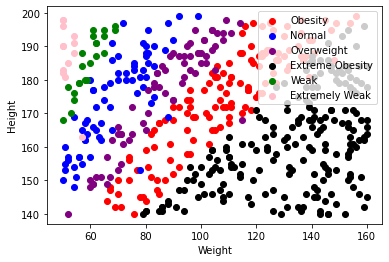

In [33]:
myScatter('Obesity','red')
myScatter('Normal','blue')
myScatter('Overweight','purple')
myScatter('Extreme Obesity','black')
myScatter('Weak','green')
myScatter('Extremely Weak','pink')
plt.legend(loc='upper right')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()
#데이터들이 무리를 이루고,전체 500 중 4~5개 데이터가 튀어있지만
#바로 분류 학습을 진행해도 괜찮을 것 같다


### 모델링
1. 문제(X)와 정답(y)으로 분리
2. 훈련데이터(train)과 평가데이터(test)로 분리
3. 모델 생성 및 하이퍼파라미터 조정
4. 학습 및 평가


In [35]:
bmi.reset_index(inplace=True)

In [36]:
bmi.head()

,Label,Gender,Height,Weight
0,Obesity,Male,174,96
1,Normal,Male,189,87
2,Obesity,Female,185,110
3,Overweight,Female,195,104
4,Overweight,Male,149,61


In [39]:
#1. 문제(X)와 정답(y)으로 분리
X= bmi.loc[:,'Height':'Weight']     #문제(키,몸무게)
y= bmi.loc[:,:'Label']    #정답(Label)

In [37]:
bmi.loc[:,'Height':'Weight']

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [38]:
bmi.loc[:,:'Label']

,Label
0,Obesity
1,Normal
2,Obesity
3,Overweight
4,Overweight
...,...
495,Extreme Obesity
496,Obesity
497,Extreme Obesity
498,Extreme Obesity


In [52]:
#2.훈련데이터(train)과 평가데이터(test)로 분리
# ->(7:3) 350:150

X_train=X.loc[:'349',:]
X_test=X.loc['350':,:]
y_train=y.loc[:'349',:]
y_test=y.loc['350':,:]

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
345,184,106
346,191,68
347,162,58
348,178,138


,Label
350,Normal
351,Normal
352,Normal
353,Extreme Obesity
354,Extremely Weak
...,...
495,Extreme Obesity
496,Obesity
497,Extreme Obesity
498,Extreme Obesity


In [53]:
X_train.shape,y_train.shape

((350, 2), (350, 1))

In [54]:
X_test.shape,y_test.shape

((150, 2), (150, 1))

In [65]:
# 3. 모델 생성
from sklearn.neighbors import  KNeighborsClassifier

In [66]:
knn_model=KNeighborsClassifier()


In [67]:
# 4. 학습
knn_model.fit(X_train,y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [68]:
#5. 평가
pre=knn_model.predict(X_test)
#예측한값

In [69]:
# 실제 답
y_test
#->예측 값과 실제 답을 맞춰봐야한다(채점)
#->성능을 확인하는 단계

,Label
350,Normal
351,Normal
352,Normal
353,Extreme Obesity
354,Extremely Weak
...,...
495,Extreme Obesity
496,Obesity
497,Extreme Obesity
498,Extreme Obesity


In [70]:
from sklearn import metrics

In [71]:
metrics.accuracy_score(pre,y_test)

0.9066666666666666

In [72]:
# 3-2 하이퍼파라미터 조정 후
knn_model2=KNeighborsClassifier(n_neighbors=10)

In [73]:
knn_model2.fit(X_train,y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [74]:
pre2=knn_model2.predict(X_test)

In [75]:
metrics.accuracy_score(pre2,y_test)

0.94

### 활용하기!

In [80]:
X_train.head(2)

,Height,Weight
0,174,96
1,189,87


In [79]:
knn_model2.predict([[165,52],[152,62],[179,75]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal', 'Overweight', 'Normal'], dtype=object)